In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

# BIG_SIZE = 14
# BIGGER_SIZE = 16
# BIGGEST_SIZE = 20

BIG_SIZE = 25
BIGGER_SIZE = 30
BIGGEST_SIZE = 35

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
# # An implementation of the CRPS function according the NRG form
# def crps(y_true, y_pred, sample_weight=None):
#     num_samples = y_pred.shape[0]
#     absolute_error = np.mean(np.abs(y_pred - y_true), axis=0)

#     if num_samples == 1:
#         return np.average(absolute_error, weights=sample_weight)

#     y_pred = np.sort(y_pred, axis=0)
#     diff = y_pred[1:] - y_pred[:-1]
#     weight = np.arange(1, num_samples) * np.arange(num_samples - 1, 0, -1)
#     weight = np.expand_dims(weight, -1)

#     per_obs_crps = absolute_error - np.sum(diff * weight, axis=0) / num_samples**2
#     return np.average(per_obs_crps, weights=sample_weight)

In [4]:
# An implementation of the CRPS function according the PWM form
def crps(y_true, y_pred, sample_weight=None):
    num_samples = y_pred.shape[0]
    absolute_error = np.mean(np.abs(y_pred - y_true), axis=0)

    if num_samples == 1:
        return np.average(absolute_error, weights=sample_weight)

    y_pred = np.sort(y_pred, axis=0)
    b0 = y_pred.mean(axis=0)
    b1_values = y_pred * np.arange(num_samples).reshape((num_samples, 1))/ (num_samples - 1)
    b1 = b1_values.mean(axis=0) # made a correction in the original code ! N-1 instead of N

    per_obs_crps = absolute_error + b0 - 2 * b1
    return np.average(per_obs_crps, weights=sample_weight)

In [5]:
data_cg1 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=25.0_to_t=35.0_grid_32_more_obs_config1.npz')
data_cg2 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')
data_det = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/vel_temp_det_data_t25_onwards_m_obs.npz')



In [6]:
ua_truth_t1 = data_cg1['ua_truth'] # t25 to t35
ua_truth_t2 = data_cg2['ua_truth'] # t35 to t45
Ta_truth_t1 = data_cg1['Ta_truth'] # t25 to t35
Ta_truth_t2 = data_cg2['Ta_truth'] # t35 to t45

In [7]:
ua_det = data_det['ua_data_det']
Ta_det = data_det['Ta_data_det']

In [8]:
ua_truth_t1.shape, ua_truth_t2.shape

((10, 84, 2), (11, 84, 2))

In [9]:
gridpoints = data_cg1['gridpoints']
print(f'gridpoints: {gridpoints}')

gridpoints: [[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]


In [10]:
ua_truth = np.concatenate((ua_truth_t1, ua_truth_t2), axis=0)
Ta_truth = np.concatenate((Ta_truth_t1, Ta_truth_t2), axis=0)

In [11]:
ua_truth.shape, Ta_truth.shape

((21, 84, 2), (21, 84))

In [12]:
n_tsteps = 21 
n_obs_points = gridpoints.shape[0]
n_stoch = 50

In [13]:
crps_ux_one_det = np.zeros((n_tsteps, 1)) # calculate crps at each time step
crps_uy_one_det = np.zeros((n_tsteps, 1))
crps_temp_one_det = np.zeros((n_tsteps, 1))
for t in range(n_tsteps):
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)
    truth_mat_temp = Ta_truth[t, :].reshape(1, -1)

    obs_mat_ux = ua_det[t, :,0].reshape(1, -1)
    obs_mat_uy = ua_det[t, :,1].reshape(1, -1)
    obs_mat_temp = Ta_det[t, :].reshape(1, -1)


    crps_ux_one_det[t] = crps(truth_mat_ux, obs_mat_ux)
    crps_uy_one_det[t] = crps(truth_mat_uy, obs_mat_uy)
    crps_temp_one_det[t] = crps(truth_mat_temp, obs_mat_temp)

In [14]:
crps_ux_sto_t = np.zeros((n_tsteps, 1)) # calculate crps at each time step
crps_uy_sto_t = np.zeros((n_tsteps, 1))
crps_temp_sto_t = np.zeros((n_tsteps, 1))
for t in range(n_tsteps):
    obs_mat_ux = np.zeros((n_stoch, n_obs_points)) # arrange observations in a suitable form at each tstep
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)

    obs_mat_uy = np.zeros((n_stoch, n_obs_points))
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)

    obs_mat_temp = np.zeros((n_stoch, n_obs_points))
    truth_mat_temp = Ta_truth[t, :].reshape(1, -1)

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        obs_mat_ux[k, :] = vel_data_stoch[t, :, 0] # each row of observation matrix correspond to a particle's value at observation points
        obs_mat_uy[k, :] = vel_data_stoch[t, :, 1]
        obs_mat_temp[k, :] = temp_data_stoch[t, :]

    crps_ux_sto_t[t] = crps(truth_mat_ux, obs_mat_ux)
    crps_uy_sto_t[t] = crps(truth_mat_uy, obs_mat_uy)
    crps_temp_sto_t[t] = crps(truth_mat_temp, obs_mat_temp)

In [15]:
crps_ux_det_t = np.zeros((n_tsteps, 1)) # calculate crps at each time step
crps_uy_det_t = np.zeros((n_tsteps, 1))
crps_temp_det_t = np.zeros((n_tsteps, 1))
for t in range(n_tsteps):
    obs_mat_ux = np.zeros((n_stoch, n_obs_points)) # arrange observations in a suitable form at each tstep
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)

    obs_mat_uy = np.zeros((n_stoch, n_obs_points))
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)

    obs_mat_temp = np.zeros((n_stoch, n_obs_points))
    truth_mat_temp = Ta_truth[t, :].reshape(1, -1)

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t25_onwards_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        obs_mat_ux[k, :] = vel_data_stoch[t, :, 0] # each row of observation matrix correspond to a particle's value at observation points
        obs_mat_uy[k, :] = vel_data_stoch[t, :, 1]
        obs_mat_temp[k, :] = temp_data_stoch[t, :]

    crps_ux_det_t[t] = crps(truth_mat_ux, obs_mat_ux)
    crps_uy_det_t[t] = crps(truth_mat_uy, obs_mat_uy)
    crps_temp_det_t[t] = crps(truth_mat_temp, obs_mat_temp)

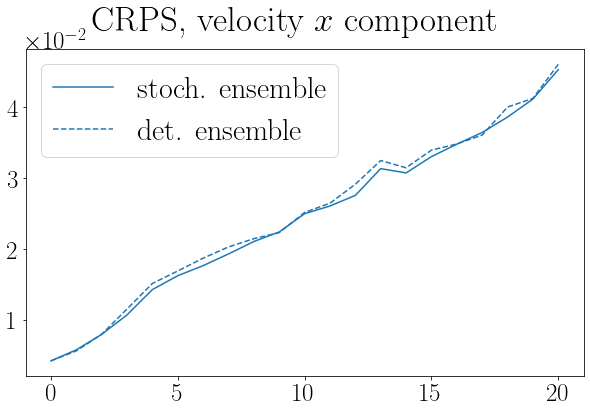

In [26]:
c1 = 'tab:blue' 
c2 = 'tab:red'
c3 = 'tab:green'
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(crps_ux_sto_t, color=c1, label=r'stoch. ensemble')
# ax.plot(crps_uy_sto_t, color=c2, label=r'stoch. ensemble, $u_y^a$')
ax.plot(crps_ux_det_t, color=c1, linestyle ='dashed', label=r'det. ensemble')
# ax.plot(crps_uy_det_t, color=c2, linestyle ='dashed', label=r'det. ensemble, $u_y^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'CRPS, velocity $x$ component')
ax.legend()
plt.savefig('../plots/rand_ic/crps_velx_det_v_stoch_ensem_50_part_var_99_ensem.pdf',bbox_inches='tight')


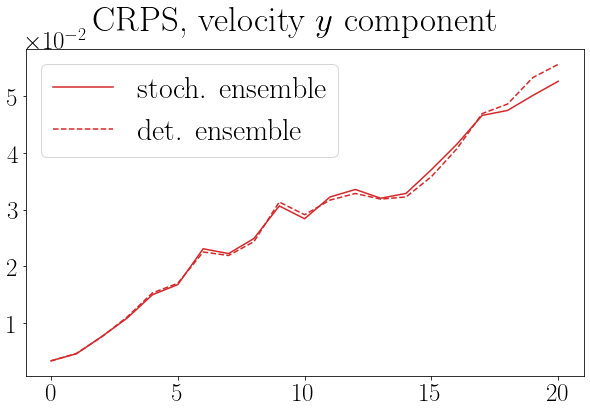

In [27]:
c1 = 'tab:blue' 
c2 = 'tab:red'
c3 = 'tab:green'
fig, ax = plt.subplots(1, figsize=(10, 6))
# ax.plot(crps_ux_sto_t, color=c1, label=r'stoch. ensemble, $u_x^a$')
ax.plot(crps_uy_sto_t, color=c2, label=r'stoch. ensemble')
# ax.plot(crps_ux_det_t, color=c1, linestyle ='dashed', label=r'det. ensemble, $u_x^a$')
ax.plot(crps_uy_det_t, color=c2, linestyle ='dashed', label=r'det. ensemble')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'CRPS, velocity $y$ component')
ax.legend()
plt.savefig('../plots/rand_ic/crps_vely_det_v_stoch_ensem_50_part_var_99_ensem.pdf',bbox_inches='tight')

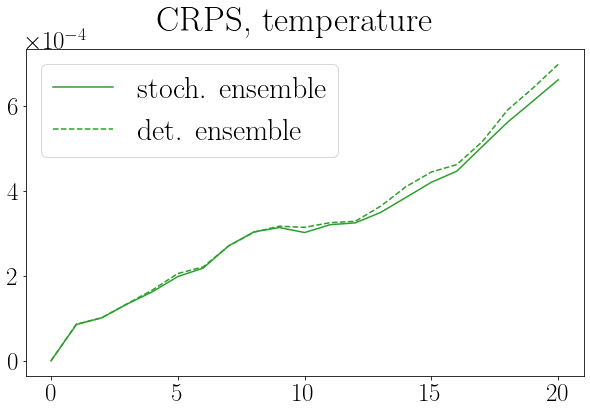

In [28]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(crps_temp_sto_t, color=c3, label=r'stoch. ensemble')
ax.plot(crps_temp_det_t, color=c3, linestyle='dashed', label=r'det. ensemble')
# ax.plot(crps_temp_one_det, color=c3, linestyle='dashdot', label=r'det. $1$ particle, $\theta$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
fig.suptitle(r'CRPS, temperature')
ax.legend()
plt.savefig('../plots/rand_ic/crps_temp_det_v_stoch_50_part_var_99_ensem_ppt.pdf',bbox_inches='tight')

In [45]:
print(f'avg. CRPS for ux, stochastic ensemble: {np.round(np.mean(crps_ux_sto_t), 4)}')
print(f'avg. CRPS for ux, deterministic ensemble: {np.round(np.mean(crps_ux_det_t), 4)}')
print(f'avg. CRPS for uy, stochastic ensemble: {np.round(np.mean(crps_uy_sto_t), 4)}')
print(f'avg. CRPS for uy, deterministic ensemble: {np.round(np.mean(crps_uy_det_t), 4)}')
print(f'avg. CRPS for ux, stochastic ensemble: {np.round(np.mean(crps_temp_sto_t), 6)}')
print(f'avg. CRPS for ux, deterministic ensemble: {np.round(np.mean(crps_temp_det_t), 6)}')


avg. CRPS for ux, stochastic ensemble: 0.0243
avg. CRPS for ux, deterministic ensemble: 0.0248
avg. CRPS for uy, stochastic ensemble: 0.0283
avg. CRPS for uy, deterministic ensemble: 0.0285
avg. CRPS for ux, stochastic ensemble: 0.000318
avg. CRPS for ux, deterministic ensemble: 0.000328


# Combined CPRS for velocity

In [46]:
crps_u_sto_t = np.zeros((n_tsteps, 1)) # calculate crps at each time step
for t in range(n_tsteps):
    obs_mat_ux = np.zeros((n_stoch, n_obs_points)) # arrange observations in a suitable form at each tstep
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)

    obs_mat_uy = np.zeros((n_stoch, n_obs_points))
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        obs_mat_ux[k, :] = vel_data_stoch[t, :, 0] # each row of observation matrix correspond to a particle's value at observation points
        obs_mat_uy[k, :] = vel_data_stoch[t, :, 1]
    
    obs_mat_u = np.concatenate((obs_mat_ux, obs_mat_uy), axis=1)
    truth_mat_u = np.concatenate((truth_mat_ux, truth_mat_uy), axis=1)

    crps_u_sto_t[t] = crps(truth_mat_u, obs_mat_u)

In [47]:
crps_u_det_t = np.zeros((n_tsteps, 1)) # calculate crps at each time step
for t in range(n_tsteps):
    obs_mat_ux = np.zeros((n_stoch, n_obs_points)) # arrange observations in a suitable form at each tstep
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)

    obs_mat_uy = np.zeros((n_stoch, n_obs_points))
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t25_onwards_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        obs_mat_ux[k, :] = vel_data_stoch[t, :, 0] # each row of observation matrix correspond to a particle's value at observation points
        obs_mat_uy[k, :] = vel_data_stoch[t, :, 1]
    
    obs_mat_u = np.concatenate((obs_mat_ux, obs_mat_uy), axis=1)
    truth_mat_u = np.concatenate((truth_mat_ux, truth_mat_uy), axis=1)

    crps_u_det_t[t] = crps(truth_mat_u, obs_mat_u)

In [48]:
crps_u_one_det = np.zeros((n_tsteps, 1)) # calculate crps at each time step
for t in range(n_tsteps):
    truth_mat_ux = ua_truth[t, :,0].reshape(1, -1)
    truth_mat_uy = ua_truth[t, :,1].reshape(1, -1)
    obs_mat_ux = ua_det[t, :,0].reshape(1, -1)
    obs_mat_uy = ua_det[t, :,1].reshape(1, -1)
    
    obs_mat_u = np.concatenate((obs_mat_ux, obs_mat_uy), axis=1)
    truth_mat_u = np.concatenate((truth_mat_ux, truth_mat_uy), axis=1)

    crps_u_one_det[t] = crps(truth_mat_u, obs_mat_u)

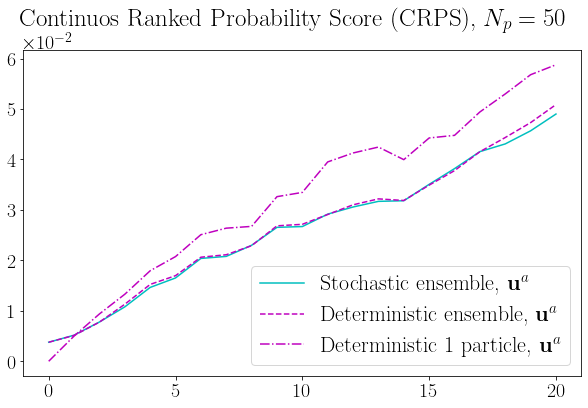

In [49]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(crps_u_sto_t, color='c', label=r'Stochastic ensemble, $\mathbf{u}^a$')
ax.plot(crps_u_det_t, color='m', linestyle ='dashed', label=r'Deterministic ensemble, $\mathbf{u}^a$')
ax.plot(crps_u_one_det, color='m', linestyle ='dashdot', label=r'Deterministic $1$ particle, $\mathbf{u}^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Continuos Ranked Probability Score (CRPS), $N_p=50$')
ax.legend()

Comparing the CRPS of det. ensemble with perturbed ic. with stochastic ensemble with same ic. $N_p =50, n_{\xi} \equiv 99$. I took the CRPS from file: uq_crps_diff_var_diff_particles_....ipynb

In [50]:
crps_data = np.load('../crps_data/crps_50_particles_99_var_same_ic.npz')

In [51]:
crps_ux_config2 = crps_data['crps_ux']
crps_uy_config2 = crps_data['crps_uy']
crps_temp_config2 = crps_data['crps_temp']

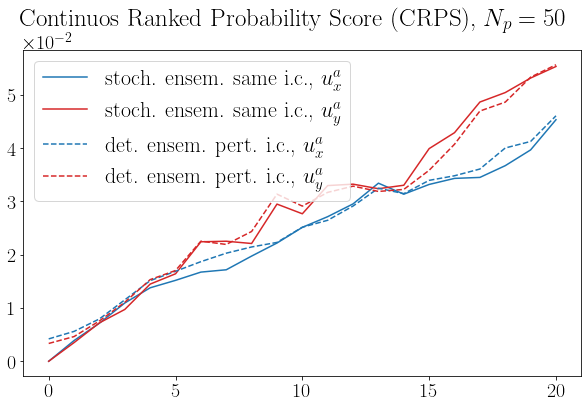

In [52]:
c1 = 'tab:blue' 
c2 = 'tab:red'
c3 = 'tab:green'
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(crps_ux_config2, color=c1, label=r'stoch. ensem. same i.c., $u_x^a$')
ax.plot(crps_uy_config2, color=c2, label=r'stoch. ensem. same i.c., $u_y^a$')
ax.plot(crps_ux_det_t, color=c1, linestyle ='dashed', label=r'det. ensem. pert. i.c., $u_x^a$')
ax.plot(crps_uy_det_t, color=c2, linestyle ='dashed', label=r'det. ensem. pert. i.c., $u_y^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Continuos Ranked Probability Score (CRPS), $N_p = 50$')
ax.legend()

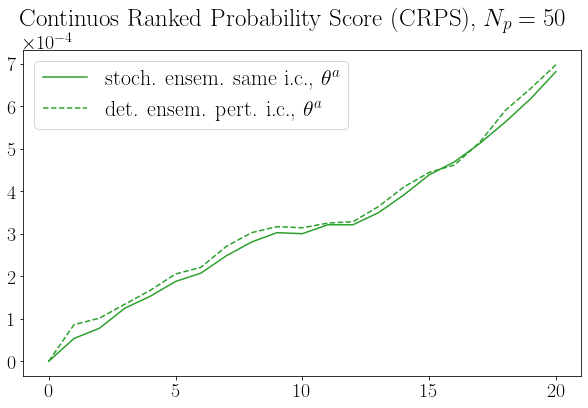

In [53]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(crps_temp_config2, color=c3, label=r'stoch. ensem. same i.c., $\theta^a$')
ax.plot(crps_temp_det_t, color=c3, linestyle='dashed', label=r'det. ensem. pert. i.c., $\theta^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,21,5))
fig.suptitle(r'Continuos Ranked Probability Score (CRPS), $N_p =50$')
ax.legend()

The stochastic ensemble with same initial condition could produce a spread with better or at least the same performance as the spread produced by deterministic ensemble which is started by perturbing the initial condition.